In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv('Delivery_Time.csv')

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df=df.rename(columns={'Delivery Time': 'delivery','Sorting Time': 'sorting' })
df

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

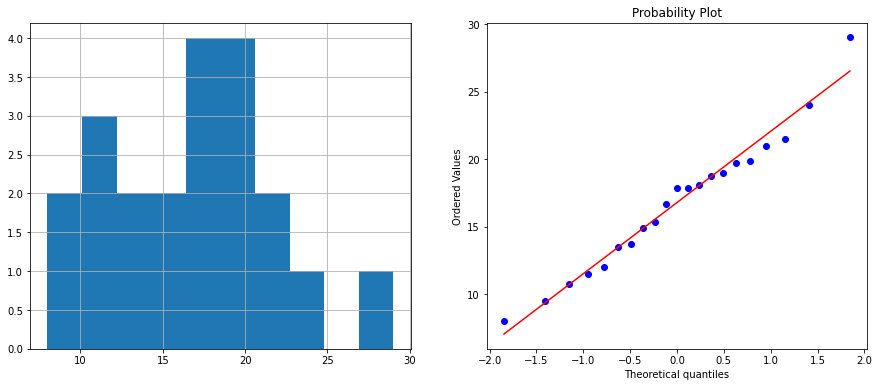

In [7]:
diagnostic_plots(df, 'delivery')

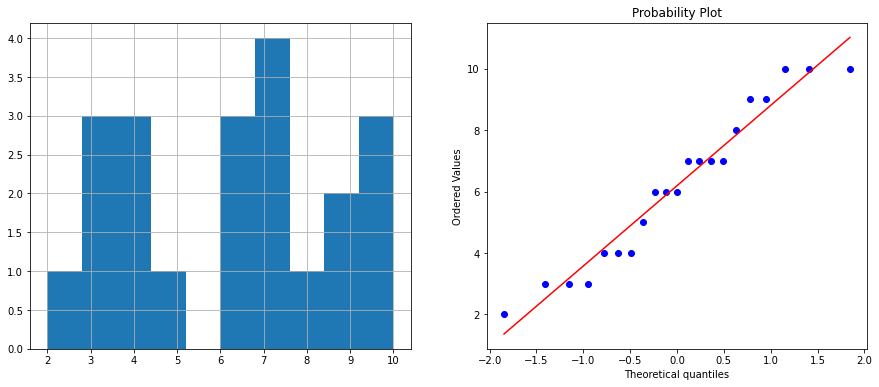

In [8]:
diagnostic_plots(df, 'sorting')

In [9]:
import statsmodels.formula.api as smf
model1=smf.ols("delivery~sorting",data=df).fit()

In [10]:
model1.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        16:20:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model1.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
sorting,1.108673,2.189367


In [13]:
pred1 = model1.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

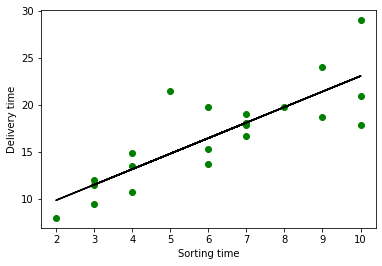

In [14]:
plt.scatter(x=df.sorting, y=df.delivery, color='green')
plt.plot(df.sorting, pred1,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='sorting', ylabel='delivery'>

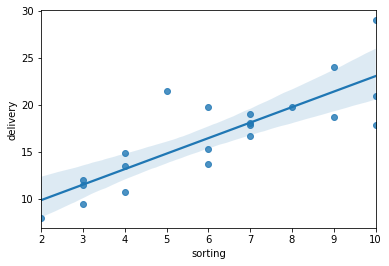

In [15]:
sns.regplot(x=df.sorting, y=df.delivery, data=df)

# Logarithmic Transformation

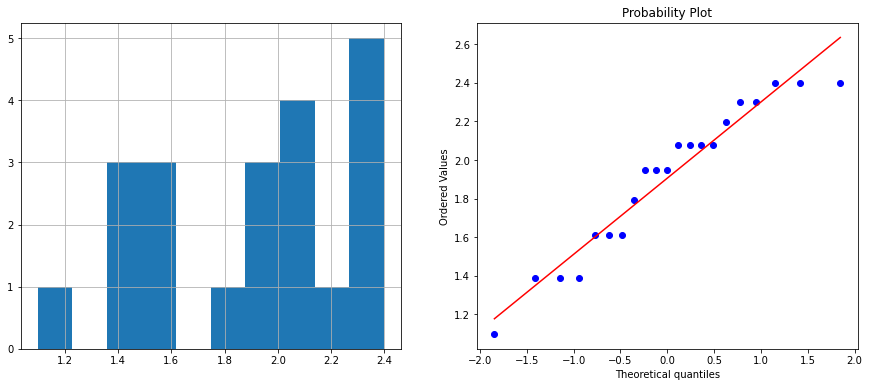

In [16]:
df['Log_sorting']=np.log(df['sorting']+1)
diagnostic_plots(df,'Log_sorting')

The logarithmic distribution does a good job in making sorting variable look Gaussian Distributed.

In [17]:
import statsmodels.formula.api as smf
model2=smf.ols("delivery~Log_sorting",data=df).fit()

In [18]:
model2.params

Intercept      -4.099013
Log_sorting    10.959246
dtype: float64

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.51e-06
Time:                        16:20:19   Log-Likelihood:                -50.857
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.0990      3.221     -1.273      0.218     -10.840       2.642
Log_sorting    10.9592      1.658      6.612      0.000       7.490      14.428
==============================================================================
Omnibus:                        5.318   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.314
Skew:                           0.929   Prob(JB):                        0.191
Kurtosis:                       3.580   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-10.840198,2.642173
Log_sorting,7.490008,14.428484


In [21]:
pred2 = model2.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

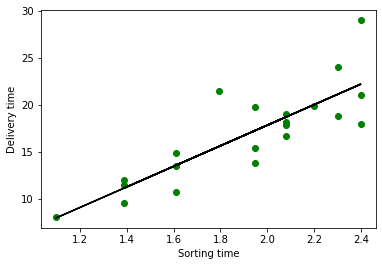

In [22]:
plt.scatter(x=df.Log_sorting, y=df.delivery, color='green')
plt.plot(df.Log_sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='Log_sorting', ylabel='delivery'>

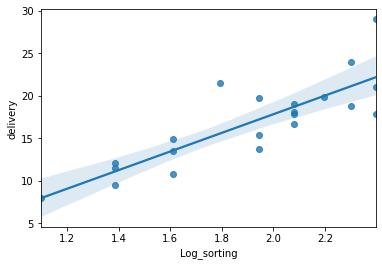

In [23]:
sns.regplot(x=df.Log_sorting, y=df.delivery, data=df)

# Reciprocal Transformation

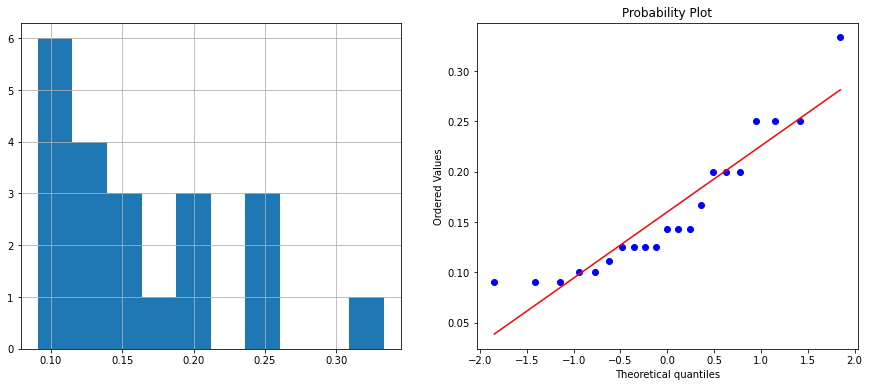

In [24]:
df['Rec_sorting']=1/(df['sorting']+1)
diagnostic_plots(df,'Rec_sorting')

In [25]:
import statsmodels.formula.api as smf
model3=smf.ols("delivery~Rec_sorting",data=df).fit()

In [26]:
model3.params

Intercept      26.775366
Rec_sorting   -62.357862
dtype: float64

In [27]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           5.59e-06
Time:                        16:20:22   Log-Likelihood:                -51.724
No. Observations:                  21   AIC:                             107.4
Df Residuals:                      19   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.7754      1.731     15.465      0.000      23.152      30.399
Rec_sorting   -62.3579     10.018     -6.225      0.000     -83.326     -41.390
==============================================================================
Omnibus:                        6.838   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.450
Skew:                           1.026   Prob(JB):                        0.108
Kurtosis:                       3.936   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,23.151590,30.399142
Rec_sorting,-83.325516,-41.390208


In [29]:
pred3 = model3.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

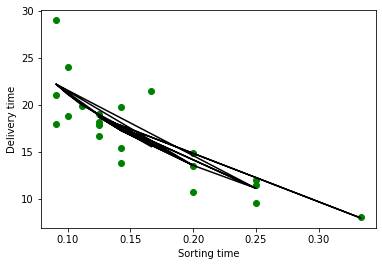

In [30]:
plt.scatter(x=df.Rec_sorting, y=df.delivery, color='green')
plt.plot(df.Rec_sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='Rec_sorting', ylabel='delivery'>

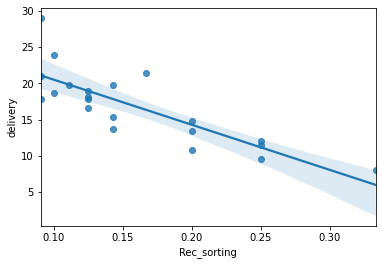

In [31]:
sns.regplot(x=df.Rec_sorting, y=df.delivery, data=df)

# Sqaure Root Tansformation

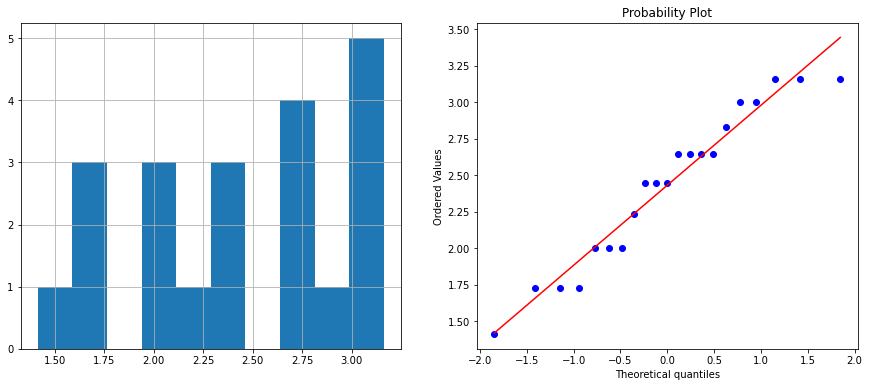

In [32]:
df['sqr_sorting']=df['sorting']**(1/2)
diagnostic_plots(df,'sqr_sorting')

In [33]:
import statsmodels.formula.api as smf
model4=smf.ols("delivery~sqr_sorting",data=df).fit()

In [34]:
model4.params

Intercept     -2.518837
sqr_sorting    7.936591
dtype: float64

In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.61e-06
Time:                        16:20:25   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqr_sorting     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pred4 = model4.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

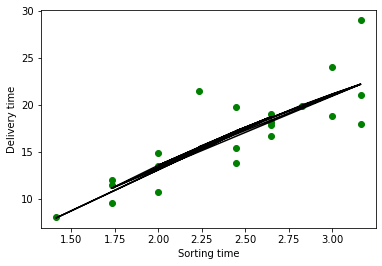

In [37]:
plt.scatter(x=df.sqr_sorting, y=df.delivery, color='green')
plt.plot(df.sqr_sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='sqr_sorting', ylabel='delivery'>

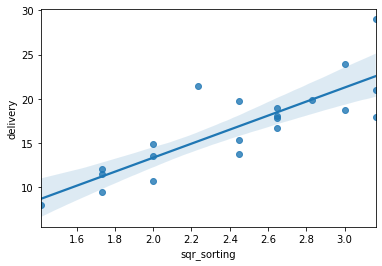

In [38]:
sns.regplot(x=df.sqr_sorting, y=df.delivery, data=df)

# Exponential Tanformation

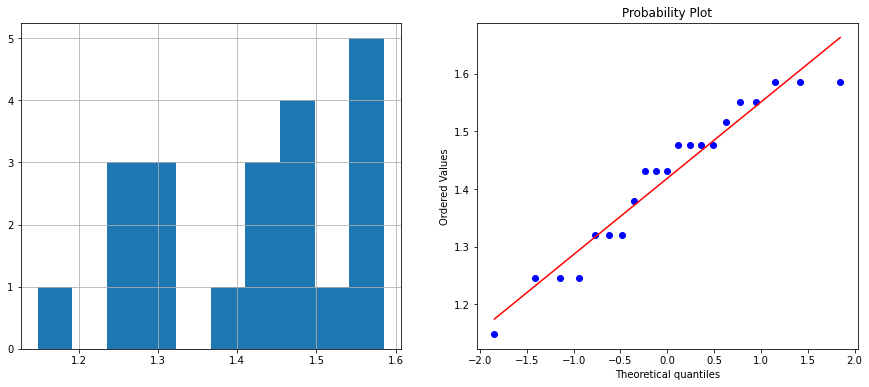

In [39]:
df['Exp_sorting']=df['sorting']**(1/5)
diagnostic_plots(df,'Exp_sorting')

In [40]:
import statsmodels.formula.api as smf
model5=smf.ols("delivery~Exp_sorting",data=df).fit()

In [41]:
model5.params

Intercept     -29.678540
Exp_sorting    32.753297
dtype: float64

In [42]:
pred5 = model5.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

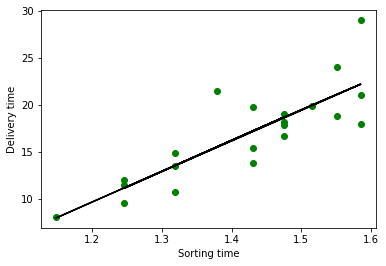

In [43]:
plt.scatter(x=df.Exp_sorting, y=df.delivery, color='green')
plt.plot(df.Exp_sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='Exp_sorting', ylabel='delivery'>

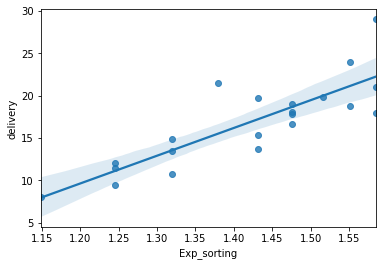

In [44]:
sns.regplot(x=df.Exp_sorting, y=df.delivery, data=df)

# BoxCox

Optimal lambda:  0.6880660292932914


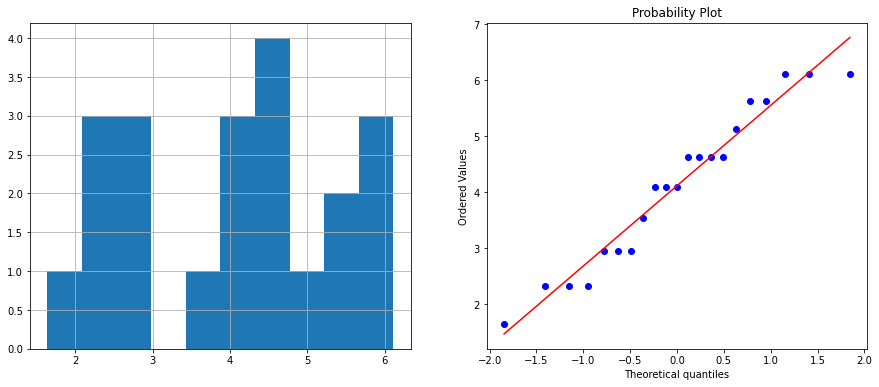

In [45]:
df['boxcox_sorting'], param = stats.boxcox(df.sorting+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'boxcox_sorting')

In [46]:
import statsmodels.formula.api as smf
model6=smf.ols("delivery~boxcox_sorting",data=df).fit()

In [47]:
model6.params

Intercept         4.339051
boxcox_sorting    3.023573
dtype: float64

In [48]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     42.42
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.07e-06
Time:                        16:20:31   Log-Likelihood:                -51.075
No. Observations:                  21   AIC:                             106.2
Df Residuals:                      19   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3391      2.013      2.155      0.044       0.125       8.553
boxcox_sorting     3.0236      0.464      6.513      0.000       2.052       3.995
==============================================================================
Omnibus:                        4.210   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.494
Skew:                           0.817   Prob(JB):                        0.287
Kurtosis:                       3.428   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred6 = model6.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

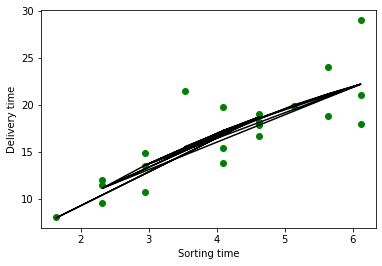

In [50]:
plt.scatter(x=df.boxcox_sorting, y=df.delivery, color='green')
plt.plot(df.boxcox_sorting, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='boxcox_sorting', ylabel='delivery'>

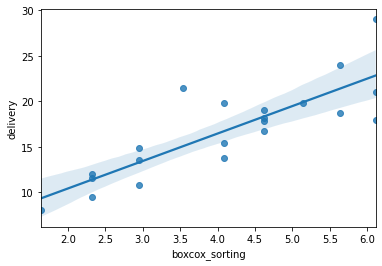

In [51]:
sns.regplot(x=df.boxcox_sorting, y=df.delivery, data=df)